*▎Классы и Признаки:*

**Классы:**

  • 0: Кот

  • 1: Воробей

  • 2: Ящерица

  • 3: Лягушка

  • 4: Карп

**Признаки:**

  • 0: Имеют шерсть

  • 1: Имеют перья

  • 2: Имеют чешую

  • 3: Живут на земле

  • 4: Дышат жабрами

  • 5: Откладывают яйца

  • 6: Умеют летать

In [ ]:
import pandas as pd

data = {
    "Признак\Класс": [
        "0: Имеют шерсть",
        "1: Имеют перья",
        "2: Имеют чешую",
        "3: Могут жить на суше",
        "4: Дышат жабрами",
        "5: Откладывают яйца",
        "6: Умеют летать"
    ],
    'Кот':     [1, 0, 0, 1, 0, 0, 0],      # Млекопитающее
    'Воробей': [0, 1, 0, 1, 0, 1, 1],      # Птица
    'Ящерица': [0, 0, 1, 1, 0, 1, 0],      # Рептилия
    'Лягушка': [0, 0, 0, 1, 0, 1, 0],      # Амфибия
    'Карп':    [0, 0, 1, 0, 1, 1, 0]       # Рыба
}

X = pd.DataFrame(data)
X.set_index("Признак\Класс", inplace=True)

# Инициализация массива весов
classes = ["Кот", "Воробей", "Ящерица", "Лягушка", "Карп"]
labels = [0, 1, 2, 3, 4]  # Метки классов
# Названия признаков
feature_descriptions = {
    0: "Имеют шерсть",
    1: "Имеют перья",
    2: "Имеют чешую",
    3: "Живут на земле",
    4: "Дышат жабрами",
    5: "Откладывают яйца",
    6: "Умеют летать"
}
arr = pd.DataFrame(0.0, index=range(len(feature_descriptions)), columns=X.columns)  # Количество классов соответствует длине classes
arr['Признак\Класс'] = X.index  # Добавляем столбец "Признак\Класс"
arr.set_index("Признак\Класс", inplace=True)

In [ ]:
# Функция для обучения
def fit(X, labels):
    global arr
    num_columns = X.shape[1]
    for x, label in zip(X.values, labels):
        arr.iloc[label] += x  # Увеличиваем вес для правильного класса
        # Уменьшаем веса для всех остальных классов
        for i in range(arr.shape[0]):
            if i != label:
                arr.iloc[i] -= x / (num_columns - 1)  # Нормализация

# Функция для тестирования
def test(X, labels):
    total = 0
    num_columns = len(labels)  # Количество строк в X

    for x, label in zip(X.values, labels):
        # Список для хранения значений для каждого класса
        values = []

        # Вычисляем произведение и находим класс с максимальным значением
        for i in range(len(arr)):
            value = sum(arr.iloc[i].iloc[j] * x[j] for j in range(len(x)))
            values.append(value)  # Сохраняем значение для текущего класса

        # Находим индекс класса с максимальным значением
        res = values.index(max(values))

        total += label == res  # Считаем правильные предсказания

        # Убедимся, что индексы корректны
        if label < len(classes) and res < len(classes):
            print("Ожидался класс:", classes[label], " - Предсказание:", classes[res])
        else:
            print("Ошибка: индекс класса выходит за пределы.")

        # Изменяем вывод значений для всех классов
        print("Значения для всех классов:", {classes[i]: v for i, v in enumerate(values) if i < len(classes)})
        print()
    print(f"Процент правильных предсказаний: {round((total / num_columns) * 100, 2)}%")

In [ ]:
# Обучение модели
fit(X, labels)
arr

,Кот,Воробей,Ящерица,Лягушка,Карп
Признак\Класс,,,,,
0: Имеют шерсть,0.75,-0.50,-0.50,-0.25,-0.50
1: Имеют перья,-0.50,0.75,-0.50,-0.25,-0.50
2: Имеют чешую,-0.50,-0.50,0.75,-0.25,0.75
3: Могут жить на суше,0.75,0.75,0.75,1.00,-0.50
4: Дышат жабрами,-0.50,-0.50,-0.50,-0.25,0.75
5: Откладывают яйца,-0.50,-0.50,-0.50,-0.25,-0.50
6: Умеют летать,-0.50,-0.50,-0.50,-0.25,-0.50


In [ ]:
# Тестирование модели
test(X, labels)

Ожидался класс: Кот  - Предсказание: Кот
Значения для всех классов: {'Кот': 0.75, 'Воробей': -0.5, 'Ящерица': -0.5, 'Лягушка': 0.75, 'Карп': -0.5}

Ожидался класс: Воробей  - Предсказание: Воробей
Значения для всех классов: {'Кот': -0.5, 'Воробей': 0.75, 'Ящерица': -0.5, 'Лягушка': 0.75, 'Карп': -0.5}

Ожидался класс: Ящерица  - Предсказание: Ящерица
Значения для всех классов: {'Кот': -1.0, 'Воробей': -1.0, 'Ящерица': 1.5, 'Лягушка': 0.25, 'Карп': 0.25}

Ожидался класс: Лягушка  - Предсказание: Лягушка
Значения для всех классов: {'Кот': -0.5, 'Воробей': -0.5, 'Ящерица': -0.5, 'Лягушка': 3.25, 'Карп': -1.75}

Ожидался класс: Карп  - Предсказание: Ящерица
Значения для всех классов: {'Кот': -0.5, 'Воробей': -0.5, 'Ящерица': 0.75, 'Лягушка': -0.5, 'Карп': 0.75}

Процент правильных предсказаний: 80.0%


Неправильно определяет
* Карп-Ящерица

Надо дообучать

Дообучение

In [ ]:
def test_and_retrain(X, labels):
    total = 0
    retrain_count = 0  # Счетчик дообучений
    i = 0  # Индекс для итерации по данным

    while i < X.shape[1]:
        x = X.iloc[i].values
        label = labels[i]

        # Список для хранения значений для каждого класса
        values = []

        # Вычисляем произведение и находим класс с максимальным значением
        for j in range(len(arr)):
            value = sum(arr.iloc[j].iloc[k] * x[k] for k in range(len(x)))
            values.append(value)  # Сохраняем значение для текущего класса

        # Находим индекс класса с максимальным значением
        res = values.index(max(values))

        total += label == res  # Считаем правильные предсказания
        print(f"Класс: {label}")

        # Проверка уверенности и равенства значений
        max_value = max(values)
        print(sorted(values, reverse=True))
        print(sorted(values, reverse=True)[0])
        print(sorted(values, reverse=True)[1])

        if values.count(max_value) > 1 or (len(values) > 1 and (sorted(values, reverse=True)[0] - sorted(values, reverse=True)[1]) < confidence_threshold):
            print(f"Модель не уверена в предсказании для {classes[res]}, дообучаем...\n")
            fit(pd.DataFrame([x]), [label])  # Дообучаем модель на текущем примере
            retrain_count += 1  # Увеличиваем счетчик дообучений
            i = 0  # Сбрасываем индекс для начала с первого элемента
        else:
            i += 1  # Переходим к следующему элементу только если дообучения не было

    print(f"Количество дообучений: {retrain_count}")

In [ ]:
# Теперь вызовем новую функцию тестирования и дообучения
test_and_retrain(X, labels)

Класс: 0
[0.75, 0.75, -0.5, -0.5, -0.5, -0.5, -0.5]
0.75
0.75
Модель не уверена в предсказании для Кот, дообучаем...

Класс: 0
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.5
Класс: 1
[0.75, 0.75, -0.5, -0.5, -0.5, -0.5, -0.5]
0.75
0.75
Модель не уверена в предсказании для Воробей, дообучаем...

Класс: 0
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.5
Класс: 1
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.5
Класс: 2
[1.5, 0.25, 0.25, -1.0, -1.0, -1.0, -1.0]
1.5
0.25
Класс: 3
[2.75, 0.25, 0.25, -1.0, -2.25, -2.25, -2.25]
2.75
0.25
Класс: 4
[0.75, 0.75, -0.5, -0.5, -0.5, -0.5, -0.5]
0.75
0.75
Модель не уверена в предсказании для Ящерица, дообучаем...

Класс: 0
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.5
Класс: 1
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.5
Класс: 2
[1.25, 1.25, 0.0, -1.25, -1.25, -1.25, -1.25]
1.25
1.25
Модель не уверена в предсказании для Ящерица, дообучаем...

Класс: 0
[1.75, 0.5, -0.75, -0.75, -0.75, -0.75, -0.75]
1.75
0.

In [ ]:
test(X, labels)

Ожидался класс: Кот  - Предсказание: Кот
Значения для всех классов: {'Кот': 1.75, 'Воробей': -0.75, 'Ящерица': -0.75, 'Лягушка': 0.5, 'Карп': -0.75}

Ожидался класс: Воробей  - Предсказание: Воробей
Значения для всех классов: {'Кот': -0.75, 'Воробей': 1.75, 'Ящерица': -0.75, 'Лягушка': 0.5, 'Карп': -0.75}

Ожидался класс: Ящерица  - Предсказание: Ящерица
Значения для всех классов: {'Кот': -2.0, 'Воробей': -2.0, 'Ящерица': 3.0, 'Лягушка': -0.75, 'Карп': 1.75}

Ожидался класс: Лягушка  - Предсказание: Лягушка
Значения для всех классов: {'Кот': 0.0, 'Воробей': 0.0, 'Ящерица': 0.0, 'Лягушка': 2.5, 'Карп': -2.5}

Ожидался класс: Карп  - Предсказание: Карп
Значения для всех классов: {'Кот': -1.25, 'Воробей': -1.25, 'Ящерица': 1.25, 'Лягушка': -1.25, 'Карп': 2.5}

Процент правильных предсказаний: 100.0%


In [ ]:
arr

,Кот,Воробей,Ящерица,Лягушка,Карп
Признак\Класс,,,,,
0: Имеют шерсть,1.75,-0.75,-0.75,-0.25,-1.25
1: Имеют перья,-0.75,1.75,-0.75,-0.25,-1.25
2: Имеют чешую,-0.75,-0.75,1.75,-0.25,1.25
3: Живут на земле,0.50,0.50,0.50,1.00,-1.25
4: Дышат жабрами,-0.75,-0.75,-0.75,-0.25,2.50
5: Откладывают яйца,-0.75,-0.75,-0.75,-0.25,-1.25
6: Умеют летать,-0.75,-0.75,-0.75,-0.25,-1.25


In [ ]:
X

,Кот,Воробей,Ящерица,Лягушка,Карп
Признак\Класс,,,,,
0: Имеют шерсть,1,0,0,0,0
1: Имеют перья,0,1,0,0,0
2: Имеют чешую,0,0,1,0,1
3: Живут на земле,1,1,1,1,0
4: Дышат жабрами,0,0,0,0,1
5: Откладывают яйца,0,1,1,1,1
6: Умеют летать,0,1,0,0,0


Пробуем подать ранее неизвестное значение - Страус (похож на воробья, но не умеет летать)

• 0: Имеют шерсть - 0

• 1: Имеют перья - 1

• 2: Имеют чешую - 0

• 3: Могут жить на земле - 1

• 4: Дышат жабрами - 0

• 5: Откладывают яйца - 1

• 6: Умеют летать - 0

In [ ]:
def test_object(x, label, X, classes):
    # Список для хранения значений для каждого класса
    values = []

    # Вычисляем произведение и находим класс с максимальным значением
    for class_name in X.columns:
        # Используем dot product для вычисления скалярного произведения
        value = X[class_name].dot(x)
        values.append(value)  # Сохраняем значение для текущего класса

    # Находим индекс класса с максимальным значением
    res = values.index(max(values))

    # Убедимся, что индексы корректны
    if label < len(classes) and res < len(classes):
        print("Ожидался класс:", classes[label], " - Предсказание:", classes[res])
    else:
        print("Ошибка: индекс класса выходит за пределы.")

    # Изменяем вывод значений для всех классов
    print("Значения для всех классов:", {classes[k]: v for k, v in enumerate(values) if k < len(classes)})


In [ ]:
#Страус, больше всего похож на воробья
obj =  [0, 1, 0, 1, 0, 1, 0]

In [ ]:
test_object(obj, 1, arr, classes)

Ожидался класс: Воробей  - Предсказание: Воробей
Значения для всех классов: {'Кот': -1.0, 'Воробей': 1.5, 'Ящерица': -1.0, 'Лягушка': 0.5, 'Карп': -3.75}


Расстояние по хэминговой мере

In [ ]:
import numpy as np
def hamming_distance(a, b):
    return np.sum(a != b)
def count_dist(res):
    classes = res.columns
    distance_matrix = pd.DataFrame(index=classes, columns=classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            distance_matrix.iloc[i,j] = hamming_distance(res[classes[i]], res[classes[j]])
    return distance_matrix.astype(int)

Визуализация расстояний между классами "в мире" на тепловой карте

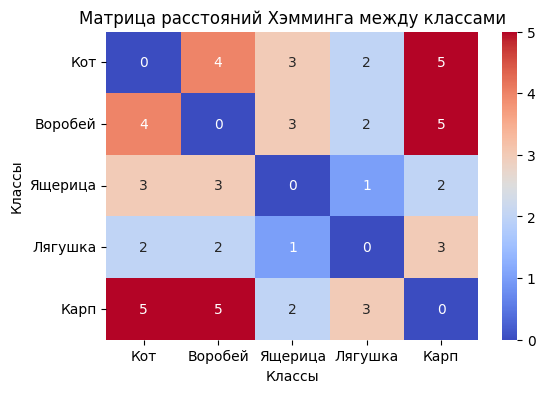

In [ ]:
distance_matrix = count_dist(X)
plt.figure(figsize=(6,4))
sns.heatmap(distance_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('Матрица расстояний Хэмминга между классами')
plt.xlabel('Классы')
plt.ylabel('Классы')
plt.show()

In [ ]:
distance_matrix

,Кот,Воробей,Ящерица,Лягушка,Карп
Кот,0,4,3,2,5
Воробей,4,0,3,2,5
Ящерица,3,3,0,1,2
Лягушка,2,2,1,0,3
Карп,5,5,2,3,0


Визуализация расстояний между классами "для модели" на тепловой карте

In [ ]:
# Инициализация списка для хранения расстояний
q = []

# Вычисление расстояний между классами
for i in range(len(classes)):
    q.append([])
    for j in range(len(classes)):
        # Вычисляем сумму абсолютных разностей для классов i и j
        difference_sum = (arr.iloc[i] - arr.iloc[j]).abs().sum()
        q[-1].append(difference_sum)

distance_matrix = pd.DataFrame(q, index=classes, columns=classes)
print("Матрица расстояний:")
distance_matrix

Матрица расстояний:


,Кот,Воробей,Ящерица,Лягушка,Карп
Кот,0.00,5.00,7.50,5.00,6.25
Воробей,5.00,0.00,7.50,5.00,6.25
Ящерица,7.50,7.50,0.00,7.50,3.75
Лягушка,5.00,5.00,7.50,0.00,8.75
Карп,6.25,6.25,3.75,8.75,0.00


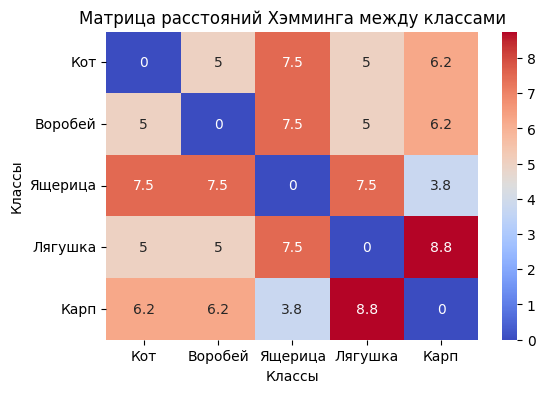

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(distance_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица расстояний Хэмминга между классами')
plt.xlabel('Классы')
plt.ylabel('Классы')
plt.show()

Линейные уравнения

In [ ]:
arr

,Кот,Воробей,Ящерица,Лягушка,Карп
Признак\Класс,,,,,
0: Имеют шерсть,1.75,-0.75,-0.75,-0.25,-1.25
1: Имеют перья,-0.75,1.75,-0.75,-0.25,-1.25
2: Имеют чешую,-0.75,-0.75,1.75,-0.25,1.25
3: Могут жить на суше,0.50,0.50,0.50,1.00,-1.25
4: Дышат жабрами,-0.75,-0.75,-0.75,-0.25,2.50
5: Откладывают яйца,-0.75,-0.75,-0.75,-0.25,-1.25
6: Умеют летать,-0.75,-0.75,-0.75,-0.25,-1.25


In [ ]:
# Генерация уравнений
for y, column in enumerate(arr.columns):
    print(f"y{y} =", end=' ')
    for i, coeff in enumerate(arr[column]):
        sign = '+' if coeff >= 0 else ''
        print(f"{sign}{coeff:.2f}*x{i}", end=' ')
    print()  # Переход на новую строку после каждого уравнения

y0 = +1.75*x0 -0.75*x1 -0.75*x2 +0.50*x3 -0.75*x4 -0.75*x5 -0.75*x6 
y1 = -0.75*x0 +1.75*x1 -0.75*x2 +0.50*x3 -0.75*x4 -0.75*x5 -0.75*x6 
y2 = -0.75*x0 -0.75*x1 +1.75*x2 +0.50*x3 -0.75*x4 -0.75*x5 -0.75*x6 
y3 = -0.25*x0 -0.25*x1 -0.25*x2 +1.00*x3 -0.25*x4 -0.25*x5 -0.25*x6 
y4 = -1.25*x0 -1.25*x1 +1.25*x2 -1.25*x3 +2.50*x4 -1.25*x5 -1.25*x6 


Оси координат и уравнения

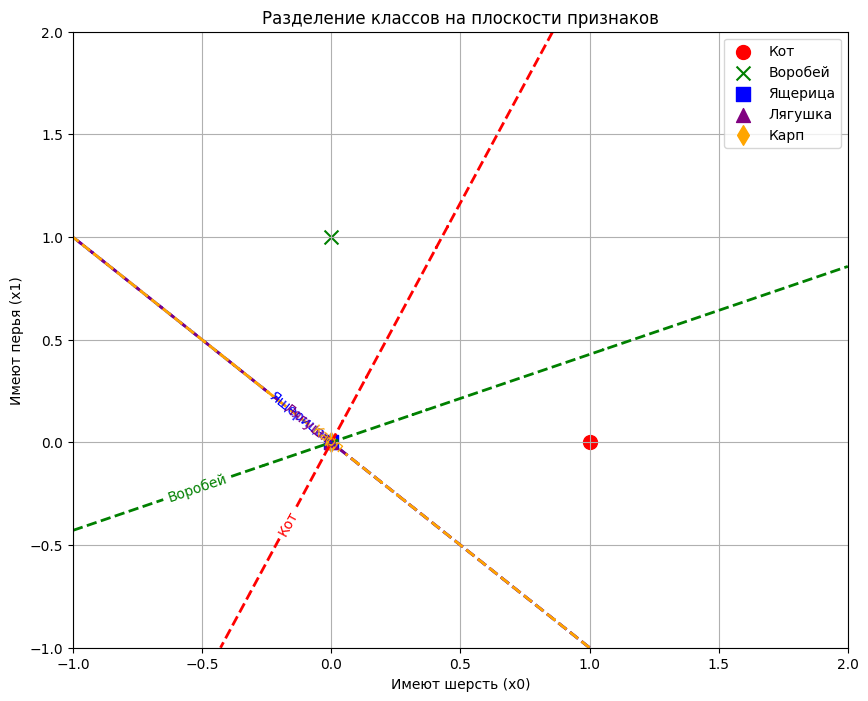

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определим уравнения для классов
def y0(x0, x1): return +1.75*x0 - 0.75*x1
def y1(x0, x1): return -0.75*x0 + 1.75*x1
def y2(x0, x1): return -0.75*x0 - 0.75*x1
def y3(x0, x1): return -0.25*x0 - 0.25*x1
def y4(x0, x1): return -1.25*x0 - 1.25*x1

# Создадим сетку значений для x0 и x1
x0_range = np.linspace(-1, 2, 400)
x1_range = np.linspace(-1, 2, 400)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)

# Вычислим значения уравнений для сетки
z0 = y0(x0_grid, x1_grid)
z1 = y1(x0_grid, x1_grid)
z2 = y2(x0_grid, x1_grid)
z3 = y3(x0_grid, x1_grid)
z4 = y4(x0_grid, x1_grid)

# Построим графики разделяющих линий
plt.figure(figsize=(10, 8))
contour0 = plt.contour(x0_grid, x1_grid, z0, levels=[0], colors='red', linestyles='dashed', linewidths=2)
contour1 = plt.contour(x0_grid, x1_grid, z1, levels=[0], colors='green', linestyles='dashed', linewidths=2)
contour2 = plt.contour(x0_grid, x1_grid, z2, levels=[0], colors='blue', linestyles='dashed', linewidths=2)
contour3 = plt.contour(x0_grid, x1_grid, z3, levels=[0], colors='purple', linestyles='dashed', linewidths=2)
contour4 = plt.contour(x0_grid, x1_grid, z4, levels=[0], colors='orange', linestyles='dashed', linewidths=2)

# Подписи для разделяющих линий
plt.clabel(contour0, inline=True, fmt='Кот', fontsize=10, colors='red')
plt.clabel(contour1, inline=True, fmt='Воробей', fontsize=10, colors='green')
plt.clabel(contour2, inline=True, fmt='Ящерица', fontsize=10, colors='blue')
plt.clabel(contour3, inline=True, fmt='Лягушка', fontsize=10, colors='purple')
plt.clabel(contour4, inline=True, fmt='Карп', fontsize=10, colors='orange')

# Отметим объекты классов
plt.scatter(1, 0, color='red', marker='o', s=100, label='Кот')
plt.scatter(0, 1, color='green', marker='x', s=100, label='Воробей')
plt.scatter(0, 0, color='blue', marker='s', s=100, label='Ящерица')
plt.scatter(0, 0, color='purple', marker='^', s=100, label='Лягушка')
plt.scatter(0, 0, color='orange', marker='d', s=100, label='Карп')

plt.xlabel('Имеют шерсть (x0)')
plt.ylabel('Имеют перья (x1)')
plt.title('Разделение классов на плоскости признаков')
plt.legend()
plt.grid(True)
plt.show()